37515
36205
35125
33345
32570
31810
31290
30480
30060
29290
28540
27850
27100
26430
25440
24660
24660
24260
23540
23280
22570
22290
21930
21720
21720
21485
20875
20605
20275
19865
19865
19805
19765
19765
19765
19765
19645
19465
19465
19315
19195
19035
18825
18825
18695
18695
18425
18425
18295
18005
17735
17505
17365
16995
16635
16455
16385
16385
16380
16290
16240
16210
16140
16140
15980
15980
15930
15930
15930
15740
15740
15730
15730
15700
15700
15700
15690
15690
15690
15690
15670
15640
15640
15100
15100
14940
14850
14850
14850
14850
14850
14850
14850
14830
14830
14830
14700
14700
14700
14700
14690
14690
14690
14640
14550
14550
14375
14375
14355
14360
14330
14310
14080
14080
14080
13980
13880
13880
13850
13850
13820
13820
13810
13810
13810
13810
13670
13670
13660
13660
13630
13630
13630
13630
13630
13630
13630
13630
13630
13630
13630
13630
13630
13630
13620
13620
13570
13570
13570
13570
13570
13570
13570
13480
13480
13480
13480
13480
13480
13480
13480
13460
13460
13460
13380
13380
1338

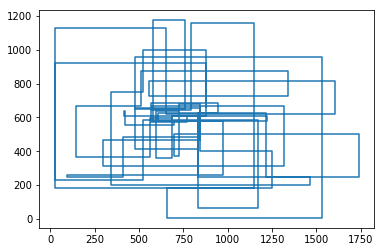

In [8]:
import pandas as pd
import numpy as np
import math
from tqdm import tqdm
from numpy.random import choice
import matplotlib.pyplot as plt
import random


df = pd.read_csv('tsp.csv', header=None, names = ['n', 'x', 'y'])


def dist(df, perm):
    m = df.shape[0]
    d=0
    for n in range(1, m):
        u = df.iloc[perm[n]]-df.iloc[perm[n-1]]
        d += abs(u.x)+abs(u.y)
    return d


def step(df, perm):
    d_list = []
    d_prob = []
    d_start = dist(df, perm)
    d = random.randint(0, df.shape[0]-1)
    for m in range(0,df.shape[0]-1):
        a = perm.copy()
        a[m] = perm[d]
        a[d] = perm[m]
        d_list.append(a)
        d_prob.append(math.exp(min((d_start - dist(df, a)),700)))
    d_prob = [x/sum(d_prob) for x in d_prob]
    ch = choice(range(0,51), 1, p=d_prob)
    perm2 = d_list[ch[0]]
    return d_list[ch[0]]
     
    
d_list = []
perm = np.random.permutation(df.shape[0])
d_list.append([perm, dist(df, perm)])
cur_min = dist(df, perm)
k = 0
while k<30:
    perm = step(df, perm)
    d_list.append([perm, dist(df, perm)])
    print(dist(df, perm))
    if dist(df, perm)<cur_min:
        k=0
        cur_min = dist(df, perm)
    else:
        k+=1
    
    
best_perm = min(d_list, key = lambda t: t[1])
print('Min route length: %s' %best_perm[1])

df2 = df
df2['perm'] = best_perm[0]*2

df2 = df2.set_index(df['perm']).drop(columns = ['perm'])

for k in range(1, 103, 2):
    df2.loc[k] = np.array([0,df2.loc[k+1,'x'],df2.loc[k-1,'y']])

df2 = df2.sort_index()

plt.plot(df2.x, df2.y)
plt.show()